In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def update_weights(X,W):
    for x in X:
        W += np.outer(x,x)
    for i in range(W.shape[0]):
        W[i,i] = 0
    return W

def recall(x,W):
    
    x = x.reshape((-1,1))
    #print(x)
    #print(W.shape)
    #x = np.sign(np.matmul(W.T,x))
    
    for i in range(x.shape[0]):
        x[i] = np.sign(np.dot(x.T,W[i,:]))
    return x


def find_pattern(x, W, epochs):
    for i in range(epochs):
        x = recall(x,W)
    return x


(11264,)
(11, 1024)
(3, 1024)


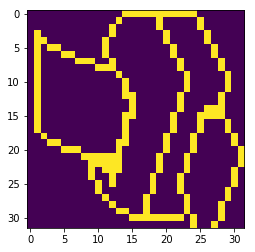

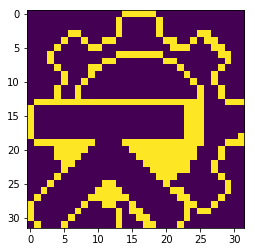

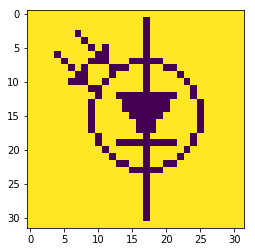

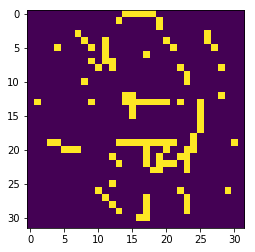

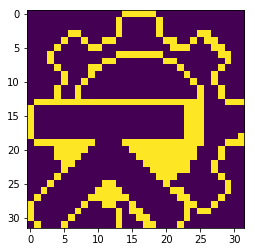

In [73]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()
print(train_X.shape)


plt.figure()
plt.imshow(train_X[2].reshape((32,32)))
W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)
epochs = 100
plt.figure()
plt.imshow(train_X[0].reshape((32,32)))
x = find_pattern(data[9],W,epochs)
plt.figure()
plt.imshow(x.reshape((32,32)))

plt.figure()
plt.imshow(train_X[1].reshape((32,32)))
x = find_pattern(data[10],W,epochs)
plt.figure()
plt.imshow(x.reshape((32,32)))

In [69]:
def recall_async(x,W):
    order = np.arange(W.shape[0]) 
    np.random.shuffle(order)
    #print(x)
    
    for i in order:
        #print(np.sum(W[i,:]*x))
        if np.sum(W[i,:]*x)>0: 
            x[i] = 1
        else:
            x[i] = -1
    return x
def find_pattern_async(x, W, epochs):
    arr = np.arange(10)
    for i in range(epochs):
        x = recall_async(x,W)
        if i %100 in arr:
            plt.figure()
            plt.imshow(x.reshape((32,32)))
    return x

(11264,)
(11, 1024)


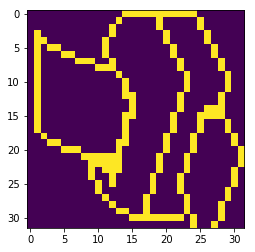

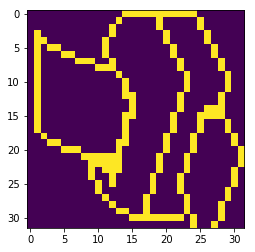

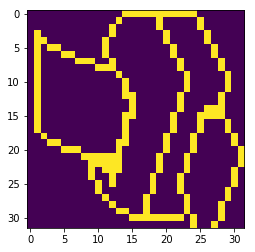

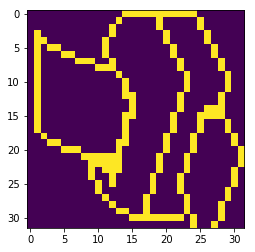

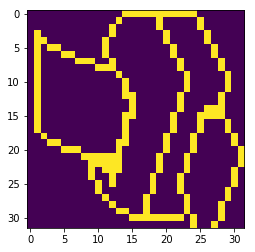

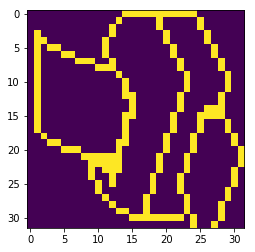

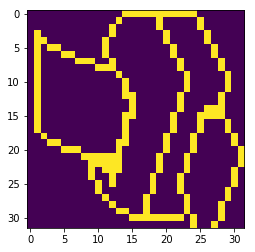

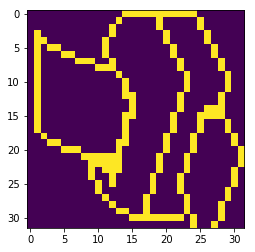

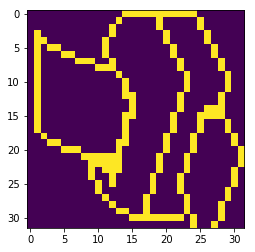

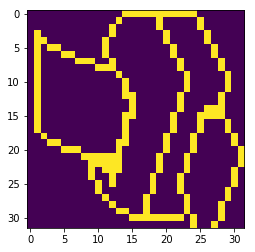

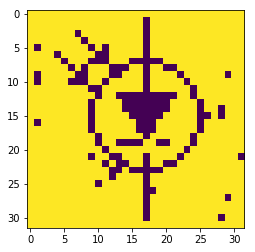

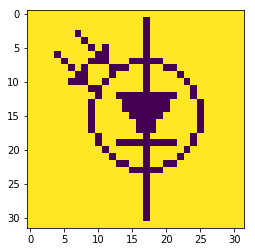

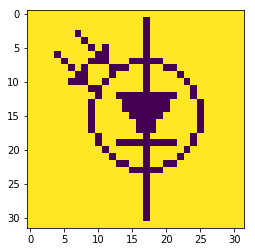

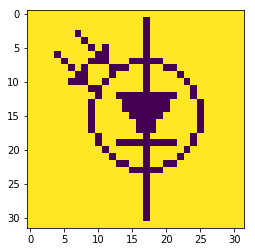

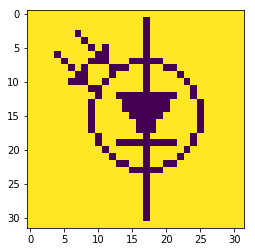

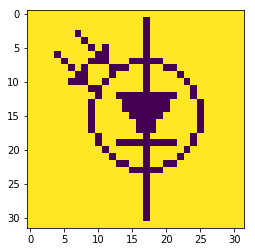

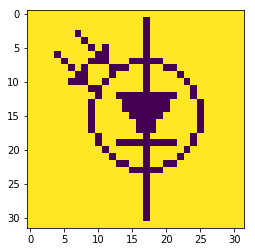

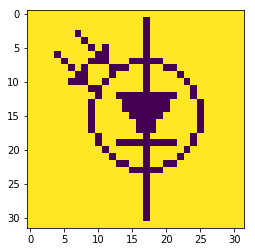

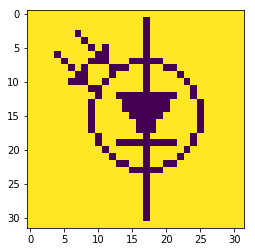

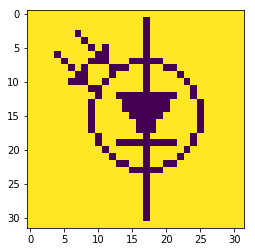

In [76]:
data = np.loadtxt('pict.dat',delimiter=",", dtype=int)
print(data.shape)
data = data.reshape(-1,1024)
print(data.shape)
#to start with learn the first three
train_X = data[0:3].copy()

W = np.zeros((train_X.shape[1],train_X.shape[1]))
W = update_weights(train_X,W)
epochs = 100
x = find_pattern_async(data[9],W,epochs)
x = find_pattern_async(data[10],W,epochs)


Vi ser att Async lyckas generera tillbaka pattern 10 som synkronos inte lyckas återgenerera. Vi ser också att de konvergerar mot olika lösningar på pattern 11. Async går mot 3 medan synk går mot 2. 